# 第12章　取引戦略の第一歩
## 12.2 一定の方式を確立する

In [3]:
#csvファイルからのデータの読み込み
import pandas as pd 
path = "c:/users/moriya/documents/Database/n225/session/"
fname="nikkei225fm_2_2015_2017.csv"
#nikkei225fm_2_2015_2017.csvのファイルに関しては著作権上はいふすることができませんので、ご了承ください。
pathfname=path+fname
n225fm=pd.read_csv(pathfname,index_col=0,parse_dates=True)
#n225fm.tail()

In [4]:
#on,s1,s12,s2,onのデータベースの構築
from datetime import date, time,datetime
c0=int(n225fm.iloc[0].Close)
da0=n225fm[0:1].index.date
r=[];da=[];j=0;on=0;s1=0

cost=2
for i in range(1,len(n225fm)):
    d=n225fm[i:i+1].index
    t=n225fm[i:i+1].index.time
    o=int(n225fm.iloc[i].Open)
    c=n225fm.iloc[i].Close
    if t==time(9,0):
        s1=c-o
        on=o-c0
    if t==time(16,30):
        s2=c-o
        s12=o-c0
        da0=datetime(d.year[0],d.month[0],d.day[0])
        if da0==datetime(2016,7,15):
            s12=0
            s2=0
            c=c0
        da.append(da0)
        r.append([])
        r[j].append(on)
        r[j].append(s1)
        r[j].append(s12)
        r[j].append(s2)
        j+=1
    c0=c
session=pd.DataFrame(r,index=da)
session.columns=['on','s1','s12','s2']

In [5]:
#それぞれのセッション、セッション間の記述統計
print(session.s1.describe())
print(session.s12.describe())
print(session.s2.describe())
print(session.on.describe())

count     733.000000
mean       -1.357435
std       171.696272
min     -1335.000000
25%       -75.000000
50%         5.000000
75%        85.000000
max       650.000000
Name: s1, dtype: float64
count    733.000000
mean       1.766712
std       42.778932
min     -170.000000
25%      -20.000000
50%        0.000000
75%       20.000000
max      320.000000
Name: s12, dtype: float64
count    733.000000
mean       5.436562
std      132.591139
min     -640.000000
25%      -60.000000
50%        5.000000
75%       80.000000
max      795.000000
Name: s2, dtype: float64
count    733.000000
mean       1.589359
std       85.775739
min     -685.000000
25%      -25.000000
50%        0.000000
75%       30.000000
max      395.000000
Name: on, dtype: float64


Text(0,0.5,u'P&L')

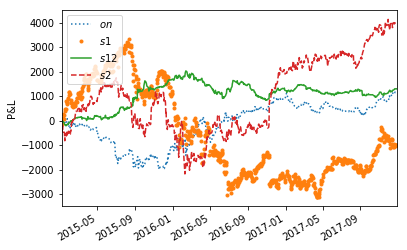

In [6]:
#累積損益のグラフ表示
%matplotlib inline
import matplotlib.pyplot as plt
session.on.cumsum().plot(label='$on$',linestyle=':')
session.s1.cumsum().plot(label='$s1$',style='.')
session.s12.cumsum().plot(label='$s12$',linestyle='-')
session.s2.cumsum().plot(label='$s2$',linestyle='--')
plt.legend(loc='upper left')
plt.ylabel('P&L')
#linestyleは線のタイプをしていする、4つのタイプがある。
#線(-）,点線（：）,破線（--）,破断線（-.）
#styleは線のスタイルを設定します。

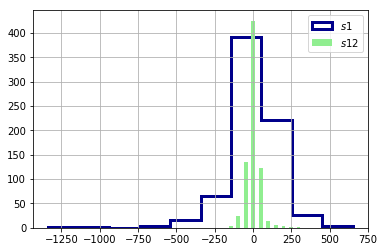

In [7]:
#s,s12のヒストグラム
session.s1.hist(label='$s1$',histtype='step',linewidth=3,color="darkblue")
session.s12.hist(label='$s12$',color="lightgreen",rwidth=0.5)
plt.legend()

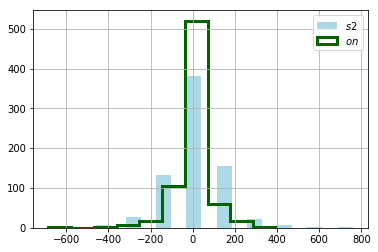

In [8]:
#s2,onのヒストグラム
session.s2.hist(label='$s2$',rwidth=0.5,color='lightblue')
session.on.hist(label='$on$',histtype='step',linewidth=3,color='darkgreen')
plt.legend()

In [9]:
#各種統計量の算出、比較
import statsmodels.api as sm
import numpy as np
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
print(sm.tsa.adfuller(session.s1,regression='nc')[1]) #[1]はp値の検定結果
print(sm.tsa.adfuller(session.s1,regression='c')[1]) #[1]はp値の検定結果
print(sm.tsa.adfuller(session.s1,regression='ct')[1]) #[1]はp値の検定結果
print(session.s1.mean()/session.s1.std()*np.sqrt(session.s1.count()))
estimator = ['JB', 'Chi-squared p-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(session.s1)
print('s1: ',lzip(estimator, test))


C:\Users\moriya\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


0.0
0.0
0.0
-0.21404753374
('s1: ', [('JB', 2922.759663050792), ('Chi-squared p-value', 0.0), ('Skew', -1.4421720100436972), ('Kurtosis', 12.347620607635372)])


In [10]:
print(sm.tsa.adfuller(session.s12,regression='nc')[1]) #[1]はp値の検定結果
print(sm.tsa.adfuller(session.s12,regression='c')[1]) #[1]はp値の検定結果
print(sm.tsa.adfuller(session.s12,regression='ct')[1]) #[1]はp値の検定結果
print(session.s1.mean()/session.s12.std()*np.sqrt(session.s1.count()))
estimator = ['JB', 'Chi-squared p-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(session.s12)
print('s12: ',lzip(estimator, test))


6.60034541589e-06
9.76567442224e-05
0.000506883465783
-0.859094926663
('s12: ', [('JB', 1894.096747662982), ('Chi-squared p-value', 0.0), ('Skew', 0.8417297297991394), ('Kurtosis', 10.693034156931796)])


In [11]:
print(sm.tsa.adfuller(session.s2,regression='nc')[1]) #[1]はp値の検定結果
print(sm.tsa.adfuller(session.s2,regression='c')[1]) #[1]はp値の検定結果
print(sm.tsa.adfuller(session.s2,regression='ct')[1]) #[1]はp値の検定結果
print(session.s2.mean()/session.s2.std()*np.sqrt(session.s2.count()))
estimator = ['JB', 'Chi-squared p-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(session.s2)
print('s2: ',lzip(estimator, test))


1.94887935184e-23
3.95630051155e-24
1.66399056433e-20
1.1100993178
('s2: ', [('JB', 399.75814021459024), ('Chi-squared p-value', 1.561790599461055e-87), ('Skew', 0.03537233534833444), ('Kurtosis', 6.617172706818729)])


In [12]:
print(sm.tsa.adfuller(session.on,regression='nc')[1]) #[1]はp値の検定結果
print(sm.tsa.adfuller(session.on,regression='c')[1]) #[1]はp値の検定結果
print(sm.tsa.adfuller(session.on,regression='ct')[1]) #[1]はp値の検定結果
print(session.on.mean()/session.on.std()*np.sqrt(session.on.count()))
estimator = ['JB', 'Chi-squared p-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(session.on)
print('on: ',lzip(estimator, test))


0.0
0.0
0.0
0.501659997992
('on: ', [('JB', 5712.912396233109), ('Chi-squared p-value', 0.0), ('Skew', -1.2325141750061597), ('Kurtosis', 16.452758134046874)])


Text(0,0.5,u'PL')

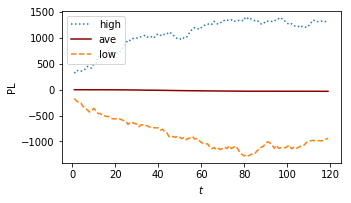

In [13]:
#s12におけるロングオンリー戦略のリターンの期間構造
plt.figure(figsize=(5,2.8))
high=[0]*120
low=[0]*120
ave=[0]*120
for i in range(120):
    high[i]=float(pd.Series.rolling(session.s12,i).sum().max())-2*i
    ave[i]=float(pd.Series.rolling(session.s12,i).sum().mean())-2*i
    low[i]=float(pd.Series.rolling(session.s12,i).sum().min())-2*i
plt.plot(high,label="high",linestyle=':')
plt.plot(ave,label='ave',color='darkred')
plt.plot(low,label='low',linestyle='--')
plt.legend(loc='upper left')
plt.xlabel('$t$')
plt.ylabel('PL')

Text(0,0.5,u'std')

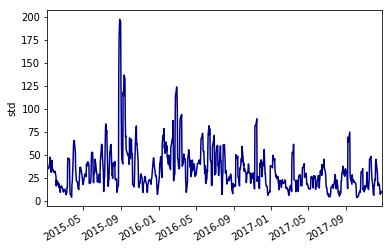

In [14]:
plt.figure(figsize=(6,4))
pd.Series.rolling(session.s12,5).std().plot(color='darkblue')
plt.ylabel('std')

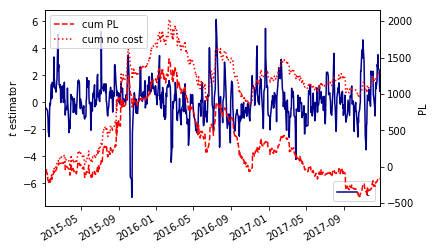

In [15]:
#t統計量と累積損益
plt.figure(figsize=(6,4))
n=5#移動ｔ値の計算に使うデータの個数
#移動t統計量の推定値の算出
ax=(pd.Series.rolling(session.s12,n).mean()/pd.Series.rolling(session.s12,n).std()\
    *np.sqrt(n)).plot(label='$t$',color='darkblue')
plt.ylabel('$t$ estimator')
plt.legend(loc='lower right')
ax2 = ax.twinx()#２番目の目盛りの設定
session['s12c']=session.s12-2
ax2=session.s12c.cumsum().plot( style="r--",label='cum PL' )
ax2=session.s12.cumsum().plot( style="r:",label='cum no cost' )
plt.ylabel('PL')
plt.legend(loc='upper left')

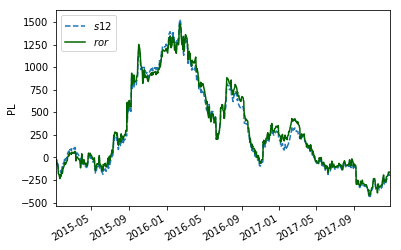

In [16]:
#t統計量を利用した戦略
from scipy.stats import t
plt.figure(figsize=(6,4))
n=5#移動ｔ値の計算に使うデータの個数
#移動t値の算出
tt=(pd.Series.rolling(session.s12,n).mean()/pd.Series.rolling(session.s12,n).std()\
    *np.sqrt(n)).shift(1).dropna()
#shift(1)を用いて1単位時間前にずらしていることに注意。
#この操作をしないと将来の情報を今使っていることになる。
port=pd.concat([session.s12c,tt],axis=1).dropna()
port.columns=['s12c','t']
t0=t.ppf(0.1,n-1)#t.ppf(x,n)=累積分布関数の逆関数
#n=採択域、nは標本数
port.s12c[port.apply(lambda x:x['t']>t0,axis=1)].cumsum().plot(label='$s12$',\
                                                               linestyle='--')
session.s12c.cumsum().plot(label='$ror$',color='darkgreen')
plt.ylabel('PL')
plt.legend(loc='upper left')

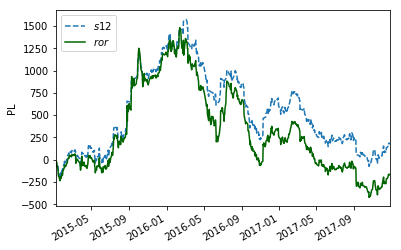

In [17]:
#カイ二乗統計量を利用した戦略
from scipy.stats import chi2
plt.figure(figsize=(6,4))
n=5
#１日前の移動標準偏差の算出
ss=pd.Series.rolling(session.s12,n).std().shift(1).dropna()
port=pd.concat([session.s12c,ss],axis=1).dropna()
port.columns=['s12c','s']#列に名前を付ける
s0=chi2.ppf(0.8,n-1)*35/(n-1)#35は真の値の推定値
#採択域は0.8、有意水準は0.1
t0=t.ppf(0.1,n-1)
port.s12c[port.apply(lambda x:(x['s']<s0),axis=1)>0].cumsum().plot(label='$s12$',\
                                                                   linestyle='--')
plt.ylabel('PL')
session.s12c.cumsum().plot(label='$ror$',color='darkgreen')
plt.legend(loc='upper left')

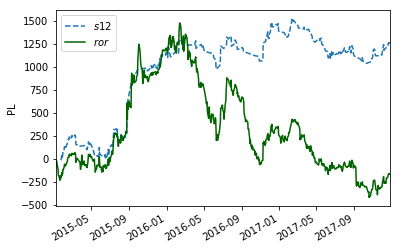

In [18]:
#トレンドの発生とボラティリティの安定性の判定
def long_stat(s,s0,t,t1):#統計的検定による買いポジションの判定
    stat=False
    if s<s0:#ボラティリティの安定性の判定
        if t>t1:#トレンドの有無の判定
            stat=True
    return stat

def create_port(session,session2,n):
    tt=(pd.Series.rolling(session,n).mean()/pd.Series.rolling(session,n).std()\
        *np.sqrt(n)).shift(1).dropna()
    ss=pd.Series.rolling(session,n).std().shift(1).dropna()
    #費用込みの損益、t値と標準偏差のデータベースの作成
    port=pd.concat([session2,ss,tt],axis=1).dropna()
    port.columns=['ror','s','t']
    return port
port=create_port(session.s12,session.s12c,n)
plt.figure(figsize=(6,4))
n=5
t0=t.ppf(0.4,n-1)#t統計量の算出
s0=chi2.ppf(0.7,n-1)*35/(n-1)#標準偏差の統計量の算出、35は真の値の推定値
port.ror[port.apply(lambda x:long_stat(x['s'],s0,x['t'],t0),axis=1)].cumsum()\
.plot(label='$s12$',linestyle='--')
session.s12c.cumsum().plot(label='$ror$',color='darkgreen')
plt.ylabel('PL')
plt.legend(loc='upper left')

(140.2549477886117, -0.27072229470594927)


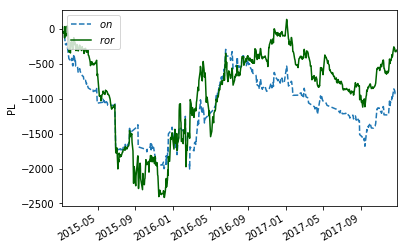

In [19]:
session['onc']=session.on-2
port=create_port(session.on,session.onc,n)
plt.figure(figsize=(6,4))
n=5
t0=t.ppf(0.4,n-1)
s0=chi2.ppf(0.7,n-1)*115/(n-1)
port.ror[port.apply(lambda x:long_stat(x['s'],s0,x['t'],t0),axis=1)].cumsum().plot(label='$on$',linestyle='--')
session.onc.cumsum().plot(label='$ror$',color='darkgreen')
plt.ylabel('PL')
plt.legend(loc='upper left')
print(s0,t0)

(170.74515382961425, -0.27072229470594927)


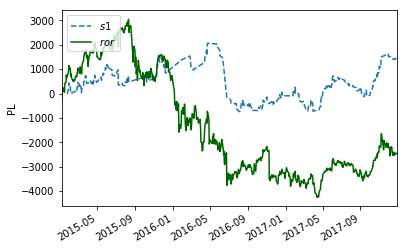

In [20]:
session['s1c']=session.s1-2
port=create_port(session.s1,session.s1c,n)
plt.figure(figsize=(6,4))
n=5
t0=t.ppf(0.4,n-1)
s0=chi2.ppf(0.7,n-1)*140/(n-1)
port.ror[port.apply(lambda x:long_stat(x['s'],s0,x['t'],t0),axis=1)].cumsum().plot(label='$s1$',linestyle='--')
session.s1c.cumsum().plot(label='$ror$',color='darkgreen')
plt.ylabel('PL')
plt.legend(loc='upper left')
print(s0,t0)

(117.08239119744977, -0.27072229470594927)


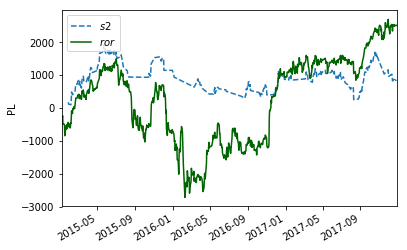

In [21]:
session['s2c']=session.s2-2
port=create_port(session.s2,session.s2c,n)
plt.figure(figsize=(6,4))
n=5
t0=t.ppf(0.4,n-1)
s0=chi2.ppf(0.7,n-1)*96/(n-1)
port.ror[port.apply(lambda x:long_stat(x['s'],s0,x['t'],t0),axis=1)].cumsum().plot(label='$s2$',linestyle='--')
session.s2c.cumsum().plot(label='$ror$',color='darkgreen')
plt.ylabel('PL')
plt.legend(loc='upper left')
print(s0,t0)

## 12.3 視点を変える

In [22]:
#ブレイクアウト戦略の関数
def upperbreakout(price,cost):
    j=0;s1=0;s1ch0=0#初期値設定
    r=[]#初期値設定
    da=[]#初期値設定
    for i in range(len(price)):
        d=price[i:i+1].index
        hm=price[i:i+1].index.time
        o=price.iloc[i].Open
        h=price.iloc[i].High
        c=price.iloc[i].Close
        if i>0:
            if hm==time(9,0):#日中立会
                s1=c-o#立会の間の値動き
                if h>h0>o:
                    s1ch0=c-h0-cost#ブレイク時の損益
                else:
                    s1ch0=0
            if hm==time(16,30):#夜間立会
                s2=c-o#立会の間の値動き
                if h>h0>o:
                    s2ch0=c-h0-cost#ブレイク時の損益
                else:
                    s2ch0=0
                da.append(datetime(d.year[0],d.month[0],d.day[0]))
                r.append([])
                r[j].append(s1)
                r[j].append(s1ch0)
                r[j].append(s2)
                r[j].append(s2ch0)
                j+=1
        h0=h
    result=pd.DataFrame(r,index=da)
    result.columns=['s1','s1ch0','s2','s2ch0']
    return result

83.9226014724


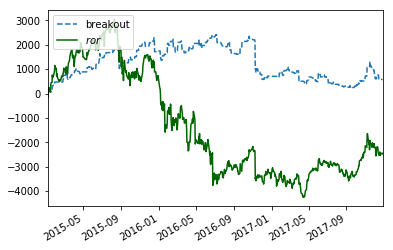

In [23]:
#ブレイクアウト戦略のグラフ表示
plt.figure(figsize=(6,4))
cost=5+2
results=upperbreakout(n225fm,cost)
results.s1ch0.cumsum().plot(label='breakout',linestyle='--')
session.s1c.cumsum().plot(label='$ror$',color='darkgreen')
plt.legend(loc='upper left')
print(results.s1ch0.std())

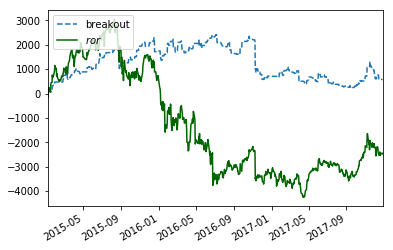

In [24]:
#ブレイクアウト戦略のグラフ表示
plt.figure(figsize=(6,4))
cost=5+2
results=upperbreakout(n225fm,cost)
results.s1ch0.cumsum().plot(label='breakout',linestyle='--')
session.s1c.cumsum().plot(label='$ror$',color='darkgreen')
plt.legend(loc='upper left')

Text(0,0.5,u'PL')

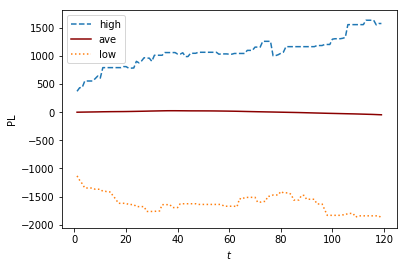

In [25]:
#120日間におけるドローダウン、リスク分析
plt.figure(figsize=(6,4))
high=[0]*120
low=[0]*120
ave=[0]*120
for i in range(120):
    high[i]=float(pd.Series.rolling(results.s1ch0,i).sum().max())
    ave[i]=float(pd.Series.rolling(results.s1ch0,i).sum().mean())
    low[i]=float(pd.Series.rolling(results.s1ch0,i).sum().min())
plt.plot(high,label="high",linestyle='--')
plt.plot(ave,label='ave',color='darkred')
plt.plot(low,label='low',linestyle=':')
plt.legend(loc='upper left')
plt.xlabel('$t$')
plt.ylabel('PL')

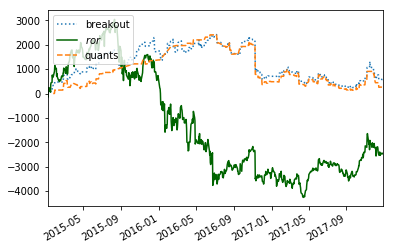

In [26]:
#統計的検定を用いたブレイクアウト戦略
plt.figure(figsize=(6,4))
results.s1ch0.cumsum().plot(label='breakout',linestyle=':')
session.s1c.cumsum().plot(label='$ror$',color="darkgreen")
n=5
t0=t.ppf(0.1,n-1)
s0=chi2.ppf(0.7,n-1)*140/(n-1)
tt=(pd.Series.rolling(results.s1,n).mean()/pd.Series.rolling(results.s1,n).std()\
    *np.sqrt(n)).shift(1).dropna()
ss=pd.Series.rolling(results.s1,n).std().shift(1).dropna()
results['t']=tt
results['s']=ss
results.s1ch0[results.apply(lambda x:long_stat(x['s'],s0,x['t'],t0),axis=1)]\
.cumsum().plot(label='quants',linestyle='--')
plt.legend(loc='upper left')

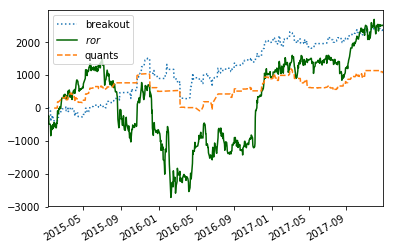

In [27]:
plt.figure(figsize=(6,4))
results.s2ch0.cumsum().plot(label='breakout',linestyle=':')
session.s2c.cumsum().plot(label='$ror$',color='darkgreen')
n=5
t0=t.ppf(0.1,n-1)
s0=chi2.ppf(0.7,n-1)*96/(n-1)
tt=(pd.Series.rolling(results.s2,n).mean()/pd.Series.rolling(results.s2,n).std()\
    *np.sqrt(n)).shift(1).dropna()
ss=pd.Series.rolling(results.s2,n).std().shift(1).dropna()
results['t']=tt
results['s']=ss
results.s2ch0[results.apply(lambda x:long_stat(x['s'],s0,x['t'],t0),axis=1)]\
.cumsum().plot(label='quants',linestyle='--')
plt.legend(loc='upper left')
